In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline

pd.set_option('display.max_colwidth', 100)

In [2]:
pip install googletrans

Note: you may need to restart the kernel to use updated packages.


In [3]:
from googletrans import Translator
import pandas as pd

In [4]:
import tweepy
from textblob import TextBlob
consumer_key = '7dzK7q6IrWCcq5Kjo3q5YDrGJ'
consumer_secret = 'd52zgvIjSq53L4TIltmpbN4iE0vZtrZAVkdz0Fw2YHdlOqwMS7'
access_token = '948413893038125056-u5qBXf9dtb4aD4MJKewEIk75N7Tf40B'
access_token_secret= '6pdoGlxNDFgHvB3Y1tTJVTTD3UXddCSf4ABBZVMh1xPxC'
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api=tweepy.API(auth)
public_tweets =api.search("कोविड", tweet_mode="extended")
i=1
for tweet in public_tweets[0:5]:print(str(i) + ') '+ tweet.full_text +'\n')
i= i + 1

1) RT @rajuparulekar: कोई भी मंदीर बनेगा तो उसमें गुरुद्वारा जैसा लंगर लगेगा या नही इसकी जानकारी लीजिए. 
दान उसी मंदीर को दीजिए जो खाना खिलाता…

1) RT @dm_hathras: जिलाधिकारी @rameshranjanias द्वारा कोविड-19 महामारी के नियंत्रण एवं रोकथाम हेतु राज्य वित्त आयोग से प्राप्त धनराशि के उपभोग…

1) @VikasBa79807077 @Falguni_INC @DeependerSHooda @LambaAlka @sushant_says @ashokbasoya @NayakRagini @lokeshchugh09 कोविड और तुम्हारे दंगाइयों के कारण जो घाटा हो रहा है उसे देखते हुए ही दाम तय हो रहे हैं
जनता तुम जैसे 70 सालों से झूठ बोलते रहे लोगों को कोई भाव नहीं देती

1) RT @MODIfiedAbhinav: #IndiaFightsCorona 👍

"९७% लोग कोविड-१९ वैक्सीनेशन एक्सपीरियंस से संतुष्ट हैं: सरकारी डेटा"

https://t.co/owo6etWHla v…

1) स्कूल प्रशासन कोविड नियमों का पालन करें, बोले बेसिक शिक्षा मंत्री जी #69K_Next_List #69k_रिक्तपदोंपरअगलीसूची #add22000in69000
पूरी खबर के लिए ऐप डाउनलोड करे: https://t.co/E4V8F8BauQ



In [5]:
df=pd.DataFrame([tweet.full_text for tweet in public_tweets], columns=['Tweets'])
df.head()

,Tweets
0,RT @rajuparulekar: कोई भी मंदीर बनेगा तो उसमें गुरुद्वारा जैसा लंगर लगेगा या नही इसकी जानकारी ली...
1,RT @dm_hathras: जिलाधिकारी @rameshranjanias द्वारा कोविड-19 महामारी के नियंत्रण एवं रोकथाम हेतु ...
2,@VikasBa79807077 @Falguni_INC @DeependerSHooda @LambaAlka @sushant_says @ashokbasoya @NayakRagin...
3,"RT @MODIfiedAbhinav: #IndiaFightsCorona 👍\n\n""९७% लोग कोविड-१९ वैक्सीनेशन एक्सपीरियंस से संतुष्ट..."
4,"स्कूल प्रशासन कोविड नियमों का पालन करें, बोले बेसिक शिक्षा मंत्री जी #69K_Next_List #69k_रिक्तपद..."


In [6]:
import re
def cleanTxt(text):
        text = re.sub(r'@[A-Za-z0-9]+', '', text)
        text = re.sub(r'#', '', text)

        text = re.sub(r'RT[\s]+', '', text)
        text = re.sub(r'https?:\/\/S+', '', text)

        return text



df['Tweets']= df['Tweets'].apply(cleanTxt)



df

,Tweets
0,: कोई भी मंदीर बनेगा तो उसमें गुरुद्वारा जैसा लंगर लगेगा या नही इसकी जानकारी लीजिए. \nदान उसी मं...
1,_hathras: जिलाधिकारी द्वारा कोविड-19 महामारी के नियंत्रण एवं रोकथाम हेतु राज्य वित्त आयोग से प्...
2,_INC _says कोविड और तुम्हारे दंगाइयों के कारण जो घाटा हो रहा है उसे देखते हुए ही दाम तय हो...
3,": IndiaFightsCorona 👍\n\n""९७% लोग कोविड-१९ वैक्सीनेशन एक्सपीरियंस से संतुष्ट हैं: सरकारी डेटा""\n..."
4,"स्कूल प्रशासन कोविड नियमों का पालन करें, बोले बेसिक शिक्षा मंत्री जी 69K_Next_List 69k_रिक्तपदों..."
5,": सनातनी_विश्वगुरु_भारत 🙏🚩\n\n""वसुधैव कुटुम्बकम्""\n\n""भारत ने गिफ्ट के रूप में दूसरे देशों को ५..."
6,: पांच लाख कोविड टीकाकरण करने वाला पहला राज्य उत्तर प्रदेश …
7,: प्रदेशभर में कोविड-19 से बचाव के लिए गुरूवार से प्रारम्भ हुए वैक्सीनेशन के दूसरे चरण में जयपुर...
8,: आज स्वास्थ्य कर्मियों के टीकाकरण के साथ-साथ कोरोना फ्रंटलाइन वर्कर्स का भी टीकाकरण प्रारंभ किय...
9,: जयपुर संभागीय आयुक्त डॉ. समित शर्मा ने कोविड वैक्सीनेशन के दूसरे चरण के पहले दिन कोविड-19 से ब...


In [7]:
from googletrans import Translator

In [8]:
translator=Translator()

In [9]:
df['English'] = df['Tweets'].apply(translator.translate, src='hi', dest='en').apply(getattr, args=('text',))

In [10]:
df

,Tweets,English
0,: कोई भी मंदीर बनेगा तो उसमें गुरुद्वारा जैसा लंगर लगेगा या नही इसकी जानकारी लीजिए. \nदान उसी मं...,": If any Mandir is made, then it will be anchored like Gurudwara or not.\nDonate to the same man..."
1,_hathras: जिलाधिकारी द्वारा कोविड-19 महामारी के नियंत्रण एवं रोकथाम हेतु राज्य वित्त आयोग से प्...,_hathras: The District Magistrate consumes the funds received from the State Finance Commission ...
2,_INC _says कोविड और तुम्हारे दंगाइयों के कारण जो घाटा हो रहा है उसे देखते हुए ही दाम तय हो...,_INC _says the price is being fixed only due to the loss due to Kovid and your rioters\nThe publ...
3,": IndiaFightsCorona 👍\n\n""९७% लोग कोविड-१९ वैक्सीनेशन एक्सपीरियंस से संतुष्ट हैं: सरकारी डेटा""\n...",": IndiaFightsCorona 👍\n\n""49% of people are satisfied with Kovid-19 Vaccination Experience: Gove..."
4,"स्कूल प्रशासन कोविड नियमों का पालन करें, बोले बेसिक शिक्षा मंत्री जी 69K_Next_List 69k_रिक्तपदों...","Follow the Kovid rules of school administration, said the Minister of Basic Education, 69K_Next_..."
5,": सनातनी_विश्वगुरु_भारत 🙏🚩\n\n""वसुधैव कुटुम्बकम्""\n\n""भारत ने गिफ्ट के रूप में दूसरे देशों को ५...",": Sanatani_wishguru_bharat 🙏🚩\n\n""Vasudhaiva Kutumbakam""\n\n""India sent 58 lakh Kovid-19 vaccine..."
6,: पांच लाख कोविड टीकाकरण करने वाला पहला राज्य उत्तर प्रदेश …,: Uttar Pradesh the first state to vaccinate five lakh kovid…
7,: प्रदेशभर में कोविड-19 से बचाव के लिए गुरूवार से प्रारम्भ हुए वैक्सीनेशन के दूसरे चरण में जयपुर...,": In the second phase of vaccination started from Thursday to protect Kovid-19 across the state,..."
8,: आज स्वास्थ्य कर्मियों के टीकाकरण के साथ-साथ कोरोना फ्रंटलाइन वर्कर्स का भी टीकाकरण प्रारंभ किय...,": Today, along with vaccination of health workers, the vaccination of corona frontline workers h..."
9,: जयपुर संभागीय आयुक्त डॉ. समित शर्मा ने कोविड वैक्सीनेशन के दूसरे चरण के पहले दिन कोविड-19 से ब...,": Jaipur Divisional Commissioner, Dr. Samit Sharma administered the vaccination of Kovid-19 on t..."


In [11]:
import pandas as pd
import nltk

df['tokenized_sents'] = df.apply(lambda row: nltk.word_tokenize(row['English']), axis=1)

In [12]:
df

,Tweets,English,tokenized_sents
0,: कोई भी मंदीर बनेगा तो उसमें गुरुद्वारा जैसा लंगर लगेगा या नही इसकी जानकारी लीजिए. \nदान उसी मं...,": If any Mandir is made, then it will be anchored like Gurudwara or not.\nDonate to the same man...","[:, If, any, Mandir, is, made, ,, then, it, will, be, anchored, like, Gurudwara, or, not, ., Don..."
1,_hathras: जिलाधिकारी द्वारा कोविड-19 महामारी के नियंत्रण एवं रोकथाम हेतु राज्य वित्त आयोग से प्...,_hathras: The District Magistrate consumes the funds received from the State Finance Commission ...,"[_hathras, :, The, District, Magistrate, consumes, the, funds, received, from, the, State, Finan..."
2,_INC _says कोविड और तुम्हारे दंगाइयों के कारण जो घाटा हो रहा है उसे देखते हुए ही दाम तय हो...,_INC _says the price is being fixed only due to the loss due to Kovid and your rioters\nThe publ...,"[_INC, _says, the, price, is, being, fixed, only, due, to, the, loss, due, to, Kovid, and, your,..."
3,": IndiaFightsCorona 👍\n\n""९७% लोग कोविड-१९ वैक्सीनेशन एक्सपीरियंस से संतुष्ट हैं: सरकारी डेटा""\n...",": IndiaFightsCorona 👍\n\n""49% of people are satisfied with Kovid-19 Vaccination Experience: Gove...","[:, IndiaFightsCorona, 👍, '', 49, %, of, people, are, satisfied, with, Kovid-19, Vaccination, Ex..."
4,"स्कूल प्रशासन कोविड नियमों का पालन करें, बोले बेसिक शिक्षा मंत्री जी 69K_Next_List 69k_रिक्तपदों...","Follow the Kovid rules of school administration, said the Minister of Basic Education, 69K_Next_...","[Follow, the, Kovid, rules, of, school, administration, ,, said, the, Minister, of, Basic, Educa..."
5,": सनातनी_विश्वगुरु_भारत 🙏🚩\n\n""वसुधैव कुटुम्बकम्""\n\n""भारत ने गिफ्ट के रूप में दूसरे देशों को ५...",": Sanatani_wishguru_bharat 🙏🚩\n\n""Vasudhaiva Kutumbakam""\n\n""India sent 58 lakh Kovid-19 vaccine...","[:, Sanatani_wishguru_bharat, 🙏🚩, '', Vasudhaiva, Kutumbakam, '', '', India, sent, 58, lakh, Kov..."
6,: पांच लाख कोविड टीकाकरण करने वाला पहला राज्य उत्तर प्रदेश …,: Uttar Pradesh the first state to vaccinate five lakh kovid…,"[:, Uttar, Pradesh, the, first, state, to, vaccinate, five, lakh, kovid…]"
7,: प्रदेशभर में कोविड-19 से बचाव के लिए गुरूवार से प्रारम्भ हुए वैक्सीनेशन के दूसरे चरण में जयपुर...,": In the second phase of vaccination started from Thursday to protect Kovid-19 across the state,...","[:, In, the, second, phase, of, vaccination, started, from, Thursday, to, protect, Kovid-19, acr..."
8,: आज स्वास्थ्य कर्मियों के टीकाकरण के साथ-साथ कोरोना फ्रंटलाइन वर्कर्स का भी टीकाकरण प्रारंभ किय...,": Today, along with vaccination of health workers, the vaccination of corona frontline workers h...","[:, Today, ,, along, with, vaccination, of, health, workers, ,, the, vaccination, of, corona, fr..."
9,: जयपुर संभागीय आयुक्त डॉ. समित शर्मा ने कोविड वैक्सीनेशन के दूसरे चरण के पहले दिन कोविड-19 से ब...,": Jaipur Divisional Commissioner, Dr. Samit Sharma administered the vaccination of Kovid-19 on t...","[:, Jaipur, Divisional, Commissioner, ,, Dr., Samit, Sharma, administered, the, vaccination, of,..."


In [14]:
def check_find_punctuations(text): 
    
    # regular expression containing 
    # all punctuation 
    result = re.findall(r'[!"\$%&\'()*+,\-.\/:;=#@?\[\\\]^_`{|}~]*',  
                        text) 
      
    # form a string 
    string = "".join(result) 
      
    # list of strings return 
    return list(string) 
    
    
# creating new column name 
# as a punctuation_used and  
# applying user defined function 
# on each rows of Comments column 
df['punctuation_used'] = df['English'].apply( 
                         lambda x : check_find_punctuations(x) 
                         )


  
# show the Dataframe 



In [15]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [16]:
df["punctuation_removed"] = df['English'].apply(remove_punctuations)
df

,Tweets,English,tokenized_sents,punctuation_used,punctuation_removed
0,: कोई भी मंदीर बनेगा तो उसमें गुरुद्वारा जैसा लंगर लगेगा या नही इसकी जानकारी लीजिए. \nदान उसी मं...,": If any Mandir is made, then it will be anchored like Gurudwara or not.\nDonate to the same man...","[:, If, any, Mandir, is, made, ,, then, it, will, be, anchored, like, Gurudwara, or, not, ., Don...","[:, ,, .]",If any Mandir is made then it will be anchored like Gurudwara or not\nDonate to the same mandir...
1,_hathras: जिलाधिकारी द्वारा कोविड-19 महामारी के नियंत्रण एवं रोकथाम हेतु राज्य वित्त आयोग से प्...,_hathras: The District Magistrate consumes the funds received from the State Finance Commission ...,"[_hathras, :, The, District, Magistrate, consumes, the, funds, received, from, the, State, Finan...","[_, :, -]",hathras The District Magistrate consumes the funds received from the State Finance Commission fo...
2,_INC _says कोविड और तुम्हारे दंगाइयों के कारण जो घाटा हो रहा है उसे देखते हुए ही दाम तय हो...,_INC _says the price is being fixed only due to the loss due to Kovid and your rioters\nThe publ...,"[_INC, _says, the, price, is, being, fixed, only, due, to, the, loss, due, to, Kovid, and, your,...","[_, _]",INC says the price is being fixed only due to the loss due to Kovid and your rioters\nThe public...
3,": IndiaFightsCorona 👍\n\n""९७% लोग कोविड-१९ वैक्सीनेशन एक्सपीरियंस से संतुष्ट हैं: सरकारी डेटा""\n...",": IndiaFightsCorona 👍\n\n""49% of people are satisfied with Kovid-19 Vaccination Experience: Gove...","[:, IndiaFightsCorona, 👍, '', 49, %, of, people, are, satisfied, with, Kovid-19, Vaccination, Ex...","[:, "", %, -, :, "", :, /, /, ., /]",IndiaFightsCorona 👍\n\n49 of people are satisfied with Kovid19 Vaccination Experience Governmen...
4,"स्कूल प्रशासन कोविड नियमों का पालन करें, बोले बेसिक शिक्षा मंत्री जी 69K_Next_List 69k_रिक्तपदों...","Follow the Kovid rules of school administration, said the Minister of Basic Education, 69K_Next_...","[Follow, the, Kovid, rules, of, school, administration, ,, said, the, Minister, of, Basic, Educa...","[,, ,, _, _, _, :, :, /, /, ., /]",Follow the Kovid rules of school administration said the Minister of Basic Education 69KNextList...
5,": सनातनी_विश्वगुरु_भारत 🙏🚩\n\n""वसुधैव कुटुम्बकम्""\n\n""भारत ने गिफ्ट के रूप में दूसरे देशों को ५...",": Sanatani_wishguru_bharat 🙏🚩\n\n""Vasudhaiva Kutumbakam""\n\n""India sent 58 lakh Kovid-19 vaccine...","[:, Sanatani_wishguru_bharat, 🙏🚩, '', Vasudhaiva, Kutumbakam, '', '', India, sent, 58, lakh, Kov...","[:, _, _, "", "", "", -, ;]",Sanataniwishgurubharat 🙏🚩\n\nVasudhaiva Kutumbakam\n\nIndia sent 58 lakh Kovid19 vaccines to ot...
6,: पांच लाख कोविड टीकाकरण करने वाला पहला राज्य उत्तर प्रदेश …,: Uttar Pradesh the first state to vaccinate five lakh kovid…,"[:, Uttar, Pradesh, the, first, state, to, vaccinate, five, lakh, kovid…]",[:],Uttar Pradesh the first state to vaccinate five lakh kovid…
7,: प्रदेशभर में कोविड-19 से बचाव के लिए गुरूवार से प्रारम्भ हुए वैक्सीनेशन के दूसरे चरण में जयपुर...,": In the second phase of vaccination started from Thursday to protect Kovid-19 across the state,...","[:, In, the, second, phase, of, vaccination, started, from, Thursday, to, protect, Kovid-19, acr...","[:, -, ,, .]",In the second phase of vaccination started from Thursday to protect Kovid19 across the state di...
8,: आज स्वास्थ्य कर्मियों के टीकाकरण के साथ-साथ कोरोना फ्रंटलाइन वर्कर्स का भी टीकाकरण प्रारंभ किय...,": Today, along with vaccination of health workers, the vaccination of corona frontline workers h...","[:, Today, ,, along, with, vaccination, of, health, workers, ,, the, vaccination, of, corona, fr...","[:, ,, ,, .]",Today along with vaccination of health workers the vaccination of corona frontline workers has ...
9,: जयपुर संभागीय आयुक्त डॉ. समित शर्मा ने कोविड वैक्सीनेशन के दूसरे चरण के पहले दिन कोविड-19 से ब...,": Jaipur Divisional Commissioner, Dr. Samit Sharma administered the vaccination of Kovid-19 on t...","[:, Jaipur, Divisional, Commissioner, ,, Dr., Sa

In [17]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS



print(len(STOP_WORDS))
print(STOP_WORDS)
df['stopword_remove'] = df['punctuation_removed'].apply(lambda x: ' '.join([word for word in x.split() if word not in (STOP_WORDS)]))
df

312
{'hence', 'is', 'one', 'became', 'due', 'last', 'eleven', "'ve", 'an', 'forty', 'per', 'more', 'anyhow', 'enough', 'of', 'nevertheless', 'where', 'twelve', 'themselves', 'three', 'no', 'get', 'same', 'cannot', 'but', "'ll", 'namely', 'herself', 'someone', 'might', 'twenty', 'some', 'nothing', 'whereby', 'top', 'you', 'serious', 'say', 'thereupon', 'behind', 'every', 'he', 'otherwise', 'upon', 'latterly', 'can', 'used', 'then', 'yet', 'else', 'various', 'off', 'into', 'several', 'former', 'beside', 'over', 'after', 'alone', 'have', 'below', 'above', 'hereby', 'too', 'thereafter', 'next', 'using', 'himself', 'regarding', 'two', 'wherein', 'through', 'my', 'nobody', 'with', 'could', 'side', 'fifty', 'towards', 'his', 'so', 'via', 'such', 'we', 'been', 're', 'done', 'yours', 'everyone', 'perhaps', 'amongst', 'almost', "'m", 'anywhere', 'quite', 'often', 'ourselves', 'to', 'rather', "n't", 'did', 'back', "'re", 'few', 'am', 'put', 'eight', 'hereupon', 'becomes', 'hereafter', 'while', 'i

,Tweets,English,tokenized_sents,punctuation_used,punctuation_removed,stopword_remove
0,: कोई भी मंदीर बनेगा तो उसमें गुरुद्वारा जैसा लंगर लगेगा या नही इसकी जानकारी लीजिए. \nदान उसी मं...,": If any Mandir is made, then it will be anchored like Gurudwara or not.\nDonate to the same man...","[:, If, any, Mandir, is, made, ,, then, it, will, be, anchored, like, Gurudwara, or, not, ., Don...","[:, ,, .]",If any Mandir is made then it will be anchored like Gurudwara or not\nDonate to the same mandir...,If Mandir anchored like Gurudwara Donate mandir feeds…
1,_hathras: जिलाधिकारी द्वारा कोविड-19 महामारी के नियंत्रण एवं रोकथाम हेतु राज्य वित्त आयोग से प्...,_hathras: The District Magistrate consumes the funds received from the State Finance Commission ...,"[_hathras, :, The, District, Magistrate, consumes, the, funds, received, from, the, State, Finan...","[_, :, -]",hathras The District Magistrate consumes the funds received from the State Finance Commission fo...,hathras The District Magistrate consumes funds received State Finance Commission control prevent...
2,_INC _says कोविड और तुम्हारे दंगाइयों के कारण जो घाटा हो रहा है उसे देखते हुए ही दाम तय हो...,_INC _says the price is being fixed only due to the loss due to Kovid and your rioters\nThe publ...,"[_INC, _says, the, price, is, being, fixed, only, due, to, the, loss, due, to, Kovid, and, your,...","[_, _]",INC says the price is being fixed only due to the loss due to Kovid and your rioters\nThe public...,INC says price fixed loss Kovid rioters The public emotion people like lying 70 years
3,": IndiaFightsCorona 👍\n\n""९७% लोग कोविड-१९ वैक्सीनेशन एक्सपीरियंस से संतुष्ट हैं: सरकारी डेटा""\n...",": IndiaFightsCorona 👍\n\n""49% of people are satisfied with Kovid-19 Vaccination Experience: Gove...","[:, IndiaFightsCorona, 👍, '', 49, %, of, people, are, satisfied, with, Kovid-19, Vaccination, Ex...","[:, "", %, -, :, "", :, /, /, ., /]",IndiaFightsCorona 👍\n\n49 of people are satisfied with Kovid19 Vaccination Experience Governmen...,IndiaFightsCorona 👍 49 people satisfied Kovid19 Vaccination Experience Government data httpstcoo...
4,"स्कूल प्रशासन कोविड नियमों का पालन करें, बोले बेसिक शिक्षा मंत्री जी 69K_Next_List 69k_रिक्तपदों...","Follow the Kovid rules of school administration, said the Minister of Basic Education, 69K_Next_...","[Follow, the, Kovid, rules, of, school, administration, ,, said, the, Minister, of, Basic, Educa...","[,, ,, _, _, _, :, :, /, /, ., /]",Follow the Kovid rules of school administration said the Minister of Basic Education 69KNextList...,Follow Kovid rules school administration said Minister Basic Education 69KNextList 69kNext List ...
5,": सनातनी_विश्वगुरु_भारत 🙏🚩\n\n""वसुधैव कुटुम्बकम्""\n\n""भारत ने गिफ्ट के रूप में दूसरे देशों को ५...",": Sanatani_wishguru_bharat 🙏🚩\n\n""Vasudhaiva Kutumbakam""\n\n""India sent 58 lakh Kovid-19 vaccine...","[:, Sanatani_wishguru_bharat, 🙏🚩, '', Vasudhaiva, Kutumbakam, '', '', India, sent, 58, lakh, Kov...","[:, _, _, "", "", "", -, ;]",Sanataniwishgurubharat 🙏🚩\n\nVasudhaiva Kutumbakam\n\nIndia sent 58 lakh Kovid19 vaccines to ot...,Sanataniwishgurubharat 🙏🚩 Vasudhaiva Kutumbakam India sent 58 lakh Kovid19 vaccines countries gi...
6,: पांच लाख कोविड टीकाकरण करने वाला पहला राज्य उत्तर प्रदेश …,: Uttar Pradesh the first state to vaccinate five lakh kovid…,"[:, Uttar, Pradesh, the, first, state, to, vaccinate, five, lakh, kovid…]",[:],Uttar Pradesh the first state to vaccinate five lakh kovid…,Uttar Pradesh state vaccinate lakh kovid…
7,: प्रदेशभर में कोविड-19 से बचाव के लिए गुरूवार से प्रारम्भ हुए वैक्सीनेशन के दूसरे चरण में जयपुर...,": In the second phase of vaccination started from Thursday to protect Kovid-19 across the state,...","[:, In, the, second, phase, of, vaccination, started, from, Thursday, to, protect, Kovid-19, acr...","[:, -, ,, .]",In the second phase of vaccination started from Thursday to protect Kovid19 across the state di...,In second phase vaccination started Thursday protect Kovid19 state divisio

In [18]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [19]:
from textblob import TextBlob
def getTextSubjectivity(stopword_remove):
    return TextBlob(stopword_remove).sentiment.subjectivity


def getTextPolarity(stopword_remove):
    return TextBlob(stopword_remove).sentiment.polarity

In [20]:
df['Subjectivity'] = df['stopword_remove'].apply(getTextSubjectivity)
df['Polarity'] = df['stopword_remove'].apply(getTextPolarity)

In [21]:
df

,Tweets,English,tokenized_sents,punctuation_used,punctuation_removed,stopword_remove,Subjectivity,Polarity
0,: कोई भी मंदीर बनेगा तो उसमें गुरुद्वारा जैसा लंगर लगेगा या नही इसकी जानकारी लीजिए. \nदान उसी मं...,": If any Mandir is made, then it will be anchored like Gurudwara or not.\nDonate to the same man...","[:, If, any, Mandir, is, made, ,, then, it, will, be, anchored, like, Gurudwara, or, not, ., Don...","[:, ,, .]",If any Mandir is made then it will be anchored like Gurudwara or not\nDonate to the same mandir...,If Mandir anchored like Gurudwara Donate mandir feeds…,0.000000,0.00
1,_hathras: जिलाधिकारी द्वारा कोविड-19 महामारी के नियंत्रण एवं रोकथाम हेतु राज्य वित्त आयोग से प्...,_hathras: The District Magistrate consumes the funds received from the State Finance Commission ...,"[_hathras, :, The, District, Magistrate, consumes, the, funds, received, from, the, State, Finan...","[_, :, -]",hathras The District Magistrate consumes the funds received from the State Finance Commission fo...,hathras The District Magistrate consumes funds received State Finance Commission control prevent...,0.000000,0.00
2,_INC _says कोविड और तुम्हारे दंगाइयों के कारण जो घाटा हो रहा है उसे देखते हुए ही दाम तय हो...,_INC _says the price is being fixed only due to the loss due to Kovid and your rioters\nThe publ...,"[_INC, _says, the, price, is, being, fixed, only, due, to, the, loss, due, to, Kovid, and, your,...","[_, _]",INC says the price is being fixed only due to the loss due to Kovid and your rioters\nThe public...,INC says price fixed loss Kovid rioters The public emotion people like lying 70 years,0.133333,0.05
3,": IndiaFightsCorona 👍\n\n""९७% लोग कोविड-१९ वैक्सीनेशन एक्सपीरियंस से संतुष्ट हैं: सरकारी डेटा""\n...",": IndiaFightsCorona 👍\n\n""49% of people are satisfied with Kovid-19 Vaccination Experience: Gove...","[:, IndiaFightsCorona, 👍, '', 49, %, of, people, are, satisfied, with, Kovid-19, Vaccination, Ex...","[:, "", %, -, :, "", :, /, /, ., /]",IndiaFightsCorona 👍\n\n49 of people are satisfied with Kovid19 Vaccination Experience Governmen...,IndiaFightsCorona 👍 49 people satisfied Kovid19 Vaccination Experience Government data httpstcoo...,1.000000,0.50
4,"स्कूल प्रशासन कोविड नियमों का पालन करें, बोले बेसिक शिक्षा मंत्री जी 69K_Next_List 69k_रिक्तपदों...","Follow the Kovid rules of school administration, said the Minister of Basic Education, 69K_Next_...","[Follow, the, Kovid, rules, of, school, administration, ,, said, the, Minister, of, Basic, Educa...","[,, ,, _, _, _, :, :, /, /, ., /]",Follow the Kovid rules of school administration said the Minister of Basic Education 69KNextList...,Follow Kovid rules school administration said Minister Basic Education 69KNextList 69kNext List ...,0.125000,0.00
5,": सनातनी_विश्वगुरु_भारत 🙏🚩\n\n""वसुधैव कुटुम्बकम्""\n\n""भारत ने गिफ्ट के रूप में दूसरे देशों को ५...",": Sanatani_wishguru_bharat 🙏🚩\n\n""Vasudhaiva Kutumbakam""\n\n""India sent 58 lakh Kovid-19 vaccine...","[:, Sanatani_wishguru_bharat, 🙏🚩, '', Vasudhaiva, Kutumbakam, '', '', India, sent, 58, lakh, Kov...","[:, _, _, "", "", "", -, ;]",Sanataniwishgurubharat 🙏🚩\n\nVasudhaiva Kutumbakam\n\nIndia sent 58 lakh Kovid19 vaccines to ot...,Sanataniwishgurubharat 🙏🚩 Vasudhaiva Kutumbakam India sent 58 lakh Kovid19 vaccines countries gi...,0.000000,0.00
6,: पांच लाख कोविड टीकाकरण करने वाला पहला राज्य उत्तर प्रदेश …,: Uttar Pradesh the first state to vaccinate five lakh kovid…,"[:, Uttar, Pradesh, the, first, state, to, vaccinate, five, lakh, kovid…]",[:],Uttar Pradesh the first state to vaccinate five lakh kovid…,Uttar Pradesh state vaccinate lakh kovid…,0.000000,0.00
7,: प्रदेशभर में कोविड-19 से बचाव के लिए गुरूवार से प्रारम्भ हुए वैक्सीनेशन के दूसरे चरण में जयपुर...,": In the second phase of vaccination started from Thursday to protect Kovid-19 across the state,...","[:, In, the, second, phase, of, vaccination, started, from, Thursday, to, protect, Kovid-19, acr...","[:, -, ,, .]",In the second phase of vaccination started from Thurs

In [22]:
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

In [23]:
df['Score'] = df['Polarity'].apply(getTextAnalysis)

In [24]:
df

,Tweets,English,tokenized_sents,punctuation_used,punctuation_removed,stopword_remove,Subjectivity,Polarity,Score
0,: कोई भी मंदीर बनेगा तो उसमें गुरुद्वारा जैसा लंगर लगेगा या नही इसकी जानकारी लीजिए. \nदान उसी मं...,": If any Mandir is made, then it will be anchored like Gurudwara or not.\nDonate to the same man...","[:, If, any, Mandir, is, made, ,, then, it, will, be, anchored, like, Gurudwara, or, not, ., Don...","[:, ,, .]",If any Mandir is made then it will be anchored like Gurudwara or not\nDonate to the same mandir...,If Mandir anchored like Gurudwara Donate mandir feeds…,0.000000,0.00,Neutral
1,_hathras: जिलाधिकारी द्वारा कोविड-19 महामारी के नियंत्रण एवं रोकथाम हेतु राज्य वित्त आयोग से प्...,_hathras: The District Magistrate consumes the funds received from the State Finance Commission ...,"[_hathras, :, The, District, Magistrate, consumes, the, funds, received, from, the, State, Finan...","[_, :, -]",hathras The District Magistrate consumes the funds received from the State Finance Commission fo...,hathras The District Magistrate consumes funds received State Finance Commission control prevent...,0.000000,0.00,Neutral
2,_INC _says कोविड और तुम्हारे दंगाइयों के कारण जो घाटा हो रहा है उसे देखते हुए ही दाम तय हो...,_INC _says the price is being fixed only due to the loss due to Kovid and your rioters\nThe publ...,"[_INC, _says, the, price, is, being, fixed, only, due, to, the, loss, due, to, Kovid, and, your,...","[_, _]",INC says the price is being fixed only due to the loss due to Kovid and your rioters\nThe public...,INC says price fixed loss Kovid rioters The public emotion people like lying 70 years,0.133333,0.05,Positive
3,": IndiaFightsCorona 👍\n\n""९७% लोग कोविड-१९ वैक्सीनेशन एक्सपीरियंस से संतुष्ट हैं: सरकारी डेटा""\n...",": IndiaFightsCorona 👍\n\n""49% of people are satisfied with Kovid-19 Vaccination Experience: Gove...","[:, IndiaFightsCorona, 👍, '', 49, %, of, people, are, satisfied, with, Kovid-19, Vaccination, Ex...","[:, "", %, -, :, "", :, /, /, ., /]",IndiaFightsCorona 👍\n\n49 of people are satisfied with Kovid19 Vaccination Experience Governmen...,IndiaFightsCorona 👍 49 people satisfied Kovid19 Vaccination Experience Government data httpstcoo...,1.000000,0.50,Positive
4,"स्कूल प्रशासन कोविड नियमों का पालन करें, बोले बेसिक शिक्षा मंत्री जी 69K_Next_List 69k_रिक्तपदों...","Follow the Kovid rules of school administration, said the Minister of Basic Education, 69K_Next_...","[Follow, the, Kovid, rules, of, school, administration, ,, said, the, Minister, of, Basic, Educa...","[,, ,, _, _, _, :, :, /, /, ., /]",Follow the Kovid rules of school administration said the Minister of Basic Education 69KNextList...,Follow Kovid rules school administration said Minister Basic Education 69KNextList 69kNext List ...,0.125000,0.00,Neutral
5,": सनातनी_विश्वगुरु_भारत 🙏🚩\n\n""वसुधैव कुटुम्बकम्""\n\n""भारत ने गिफ्ट के रूप में दूसरे देशों को ५...",": Sanatani_wishguru_bharat 🙏🚩\n\n""Vasudhaiva Kutumbakam""\n\n""India sent 58 lakh Kovid-19 vaccine...","[:, Sanatani_wishguru_bharat, 🙏🚩, '', Vasudhaiva, Kutumbakam, '', '', India, sent, 58, lakh, Kov...","[:, _, _, "", "", "", -, ;]",Sanataniwishgurubharat 🙏🚩\n\nVasudhaiva Kutumbakam\n\nIndia sent 58 lakh Kovid19 vaccines to ot...,Sanataniwishgurubharat 🙏🚩 Vasudhaiva Kutumbakam India sent 58 lakh Kovid19 vaccines countries gi...,0.000000,0.00,Neutral
6,: पांच लाख कोविड टीकाकरण करने वाला पहला राज्य उत्तर प्रदेश …,: Uttar Pradesh the first state to vaccinate five lakh kovid…,"[:, Uttar, Pradesh, the, first, state, to, vaccinate, five, lakh, kovid…]",[:],Uttar Pradesh the first state to vaccinate five lakh kovid…,Uttar Pradesh state vaccinate lakh kovid…,0.000000,0.00,Neutral
7,: प्रदेशभर में कोविड-19 से बचाव के लिए गुरूवार से प्रारम्भ हुए वैक्सीनेशन के दूसरे चरण में जयपुर...,": In the second phase of vaccination started from Thursday to protect Kovid-19 across the state,...","[:, In, the, second, phase, of, vaccination, started, from, Thursday, to, protect, Kovid-19, acr...","[:,

In [25]:
positive = df[df['Score'] == 'Positive']

print(str(positive.shape[0]/(df.shape[0])*100) + " % of positive tweets")

20.0 % of positive tweets


<BarContainer object of 2 artists>

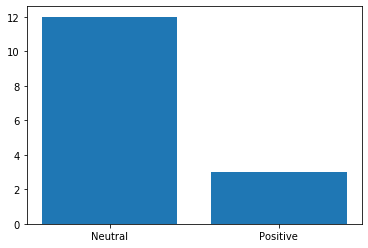

In [26]:
labels = df.groupby('Score').count().index.values

values = df.groupby('Score').size().values

plt.bar(labels, values)

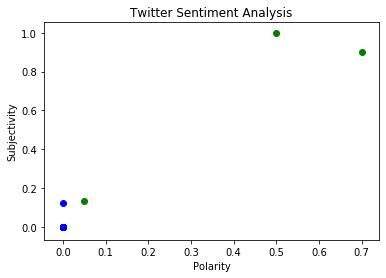

In [27]:
for index, row in df.iterrows():
    if row['Score'] == 'Positive':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="green")
    elif row['Score'] == 'Negative':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="red")
    elif row['Score'] == 'Neutral':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="blue")

plt.title('Twitter Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
# add legend
plt.show()

In [28]:
objective = df[df['Subjectivity'] == 0]

print(str(objective.shape[0]/(df.shape[0])*100) + " % of objective tweets")

73.33333333333333 % of objective tweets
